In [1]:
import matplotlib
import matplotlib.cm
import matplotlib.pyplot as plt
import pandas as pd
import re
import collections
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import itertools
import random

In [3]:
# read in data


In [4]:
import networkx as nx

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [6]:
# playing with authors name

In [7]:
# a function to fix the names. When are two names the same? 
for i in df.author.unique():
    for j in df.author.unique():
        ratio = fuzz.token_set_ratio(i,j)
        if ratio >=90: # and ratio != 100:
            #print(i, "|", j, "==", ratio)
            df.author = df.author.replace(j, i)

In [8]:
authors_papers = df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size()

In [9]:
pairs = []
for art in df.unique_key.unique():
    temp = df[df.unique_key == art]
    for auth in temp.author.unique():
        for other_auth in temp.author.unique():
            pairs.append((auth, other_auth))

In [10]:
authors = [nm for nm in authors_papers.index]

In [11]:
G = nx.Graph()
G.add_nodes_from(authors)
G.add_edges_from(pairs)

In [12]:
len(G.nodes())

1837

In [13]:
num_publications = [n for n in authors_papers.values]
norm_publications = [n/max(num_publications) for n in num_publications]

In [14]:
minimum = min(num_publications)
maximum = max(num_publications)

In [15]:
labels = {}
nodes = ['Geraint Palmer']
for nm in nodes:
    labels.update({nm: nm})
labels

{'Geraint Palmer': 'Geraint Palmer'}

In [49]:
colours = [matplotlib.cm.plasma_r(d) for d in norm_publications]

In [17]:
random.seed(0)
pos = nx.spring_layout(G)

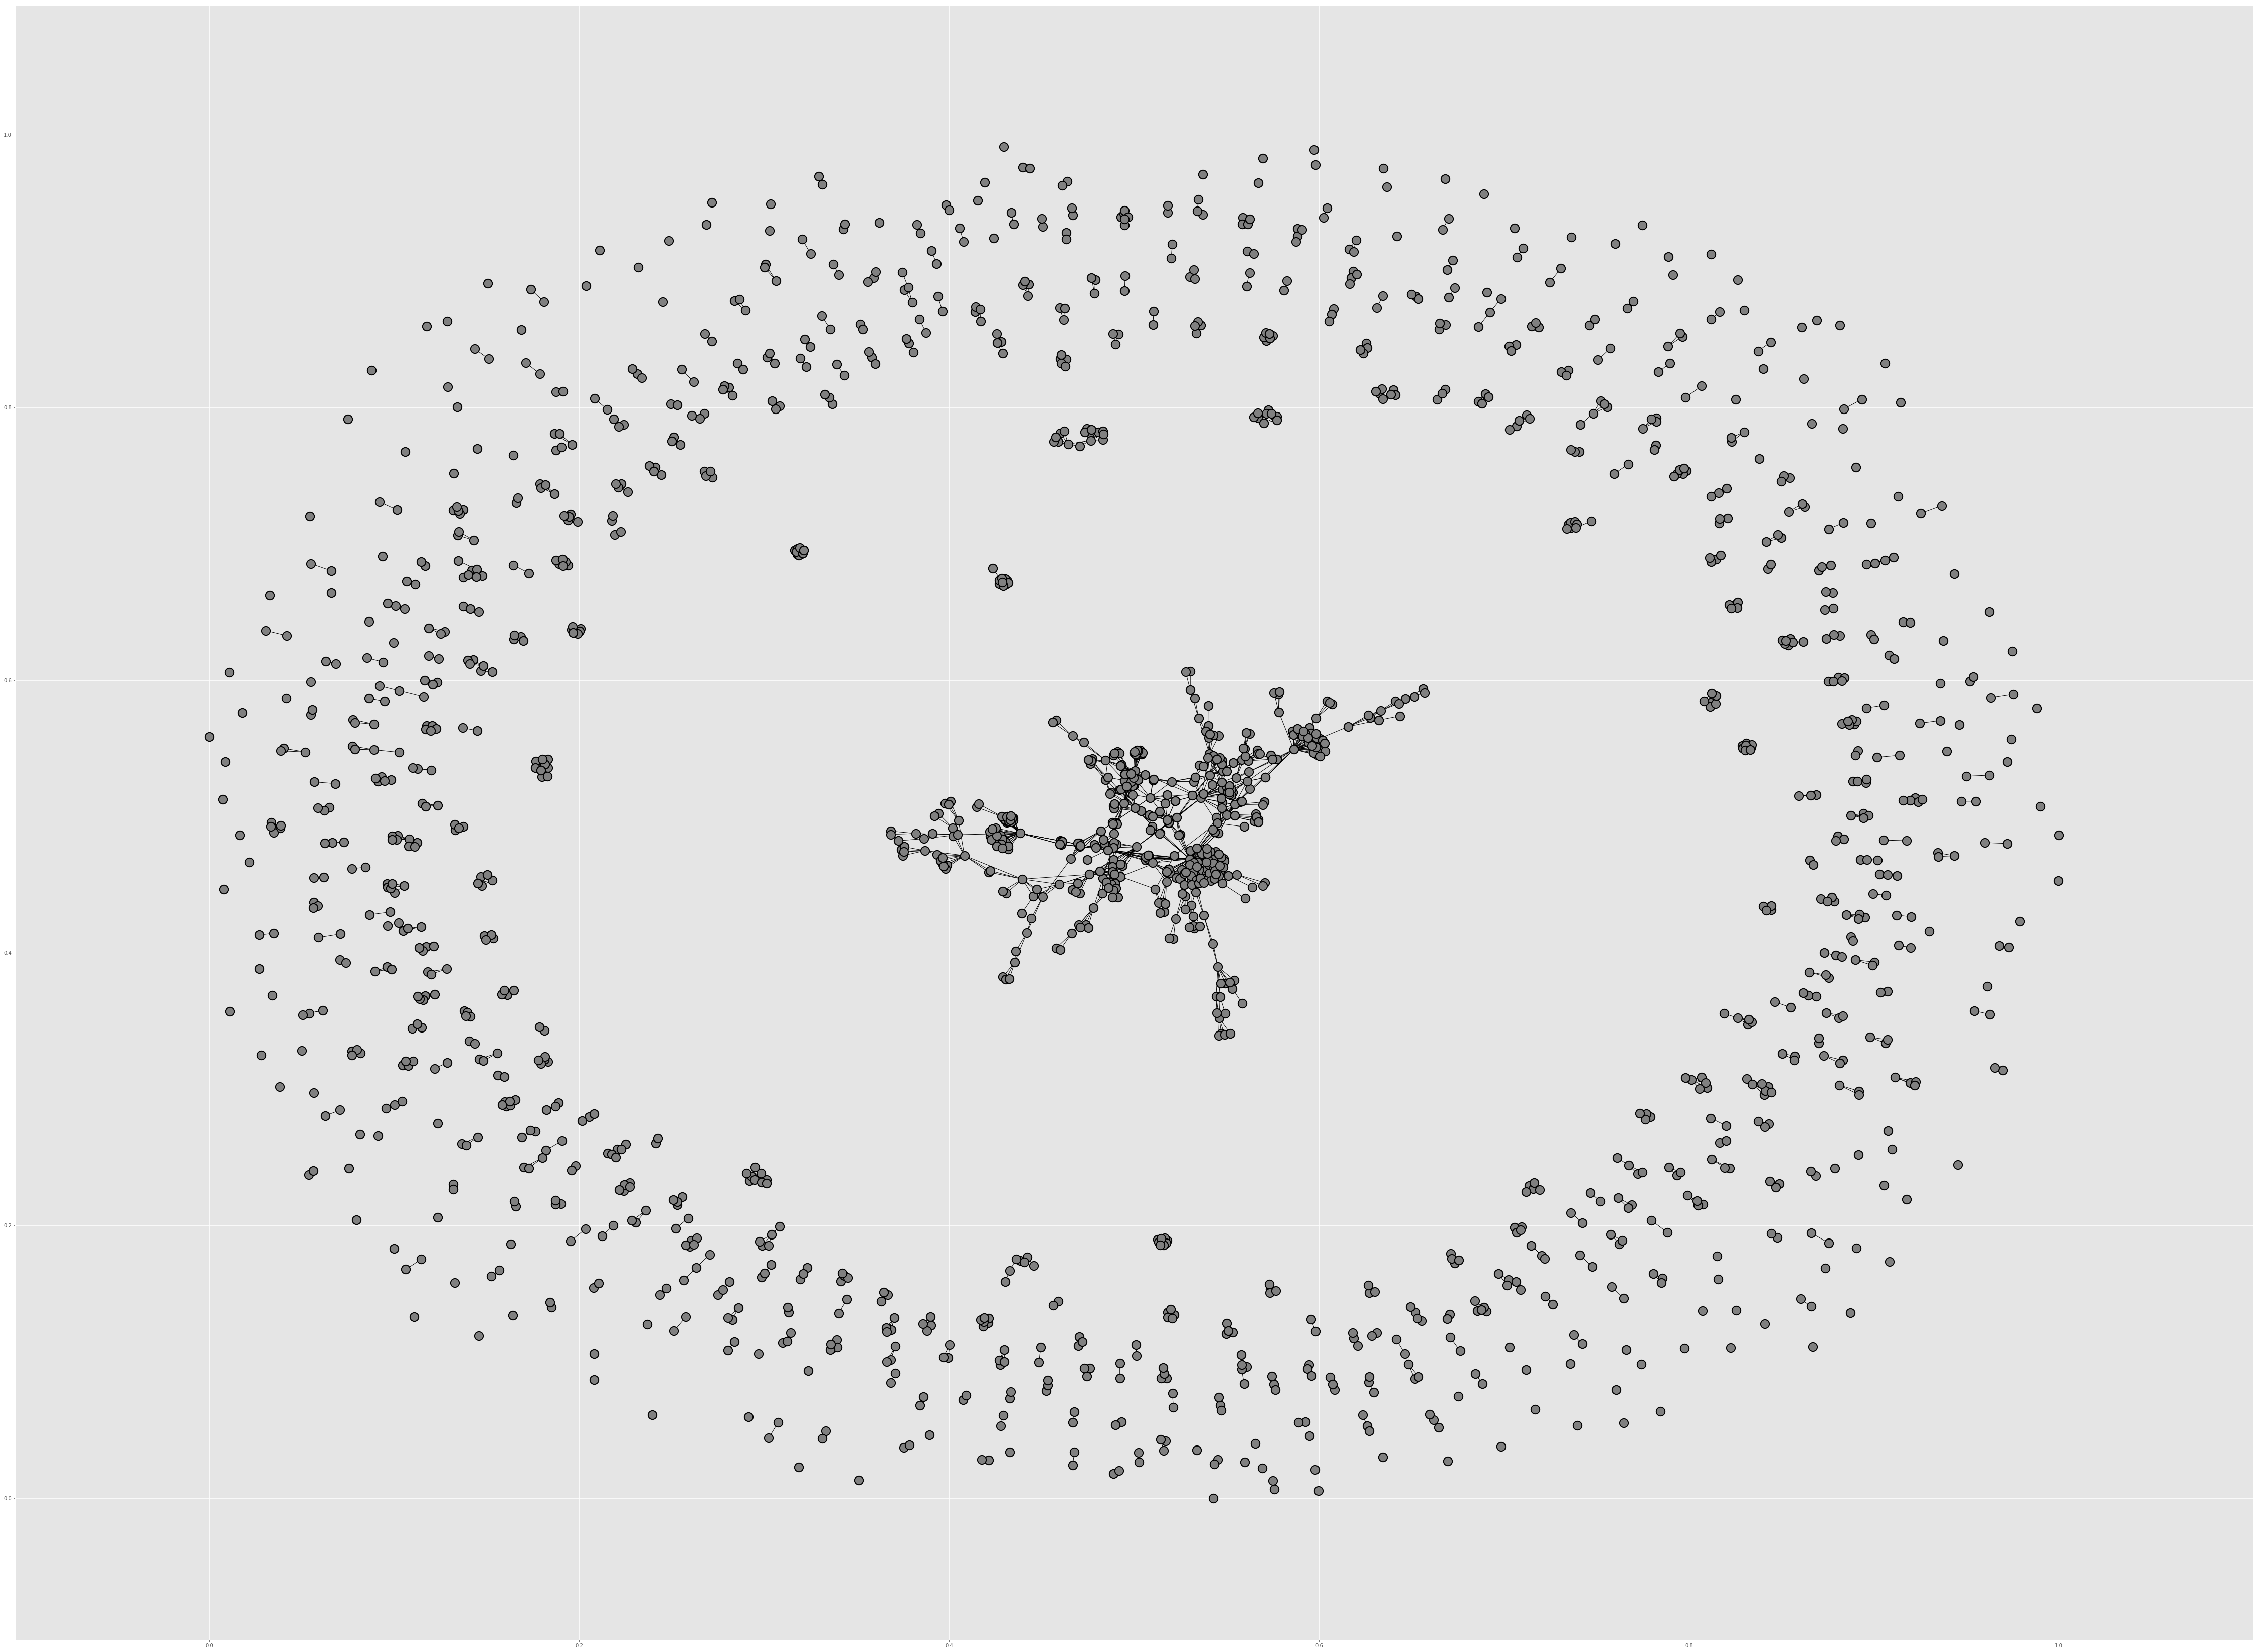

In [34]:
fig = figure(figsize=(80, 60))

#sm = plt.cm.ScalarMappable(cmap = matplotlib.cm.plasma_r)
#sm._A = []

#plt.title('Connection of Authors' , fontsize=40)
#nx.draw_spring(G)
#cbar = fig.colorbar(sm)
#cbar.set_ticks([0, 1])
#cbar.ax.set_yticklabels([minimum, maximum],fontsize=60)
#cbar.set_label("Number of Publications", fontsize=80)

#pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, linewidths=2, node_color='grey') #node_size=num_articles)
#nx.draw_networkx_labels(G, pos, labels=labels, font_size=80, font_color='maroon',)
nodes.set_edgecolor('black')

nx.draw_networkx_edges(G, pos)
plt.savefig("/home/nightwing/src/Talks/network_one.pdf", format='pdf', bbox_inches='tight')

In [35]:
# removing low values to zoom in

In [36]:
authors_papers_one = authors_papers[authors_papers > 1]

In [37]:
authors_one = [nm for nm in authors_papers_one.index]

In [38]:
df_one = df[df['author'].isin(authors_one)]

In [39]:
pairs = []
for art in df_one.unique_key.unique():
    temp = df_one[df_one.unique_key == art]
    for aut in temp.author.unique():
        for aut1 in temp.author.unique():
            pairs.append((aut, aut1))

In [40]:
G = nx.Graph()
G.add_nodes_from(authors_one)
G.add_edges_from(pairs)

In [41]:
len(G.nodes())

417

In [42]:
labels = {}
nodes = ['Jin-Li Guo', 'Martin Nowak', 'Matjaž Perc', 'Sigmund  Karl']
for nm in nodes:
    labels.update({nm: nm})
labels

{'Jin-Li Guo': 'Jin-Li Guo',
 'Martin Nowak': 'Martin Nowak',
 'Matjaž Perc': 'Matjaž Perc',
 'Sigmund  Karl': 'Sigmund  Karl'}

In [43]:
num_publications_one = [n for n in authors_papers_one.values]
norm_publications_one = [n/max(num_publications_one) for n in num_publications_one]

In [44]:
minimum = min(num_publications_one)
maximum = max(num_publications_one)

In [45]:
random.seed(0)
pos = nx.spring_layout(G)

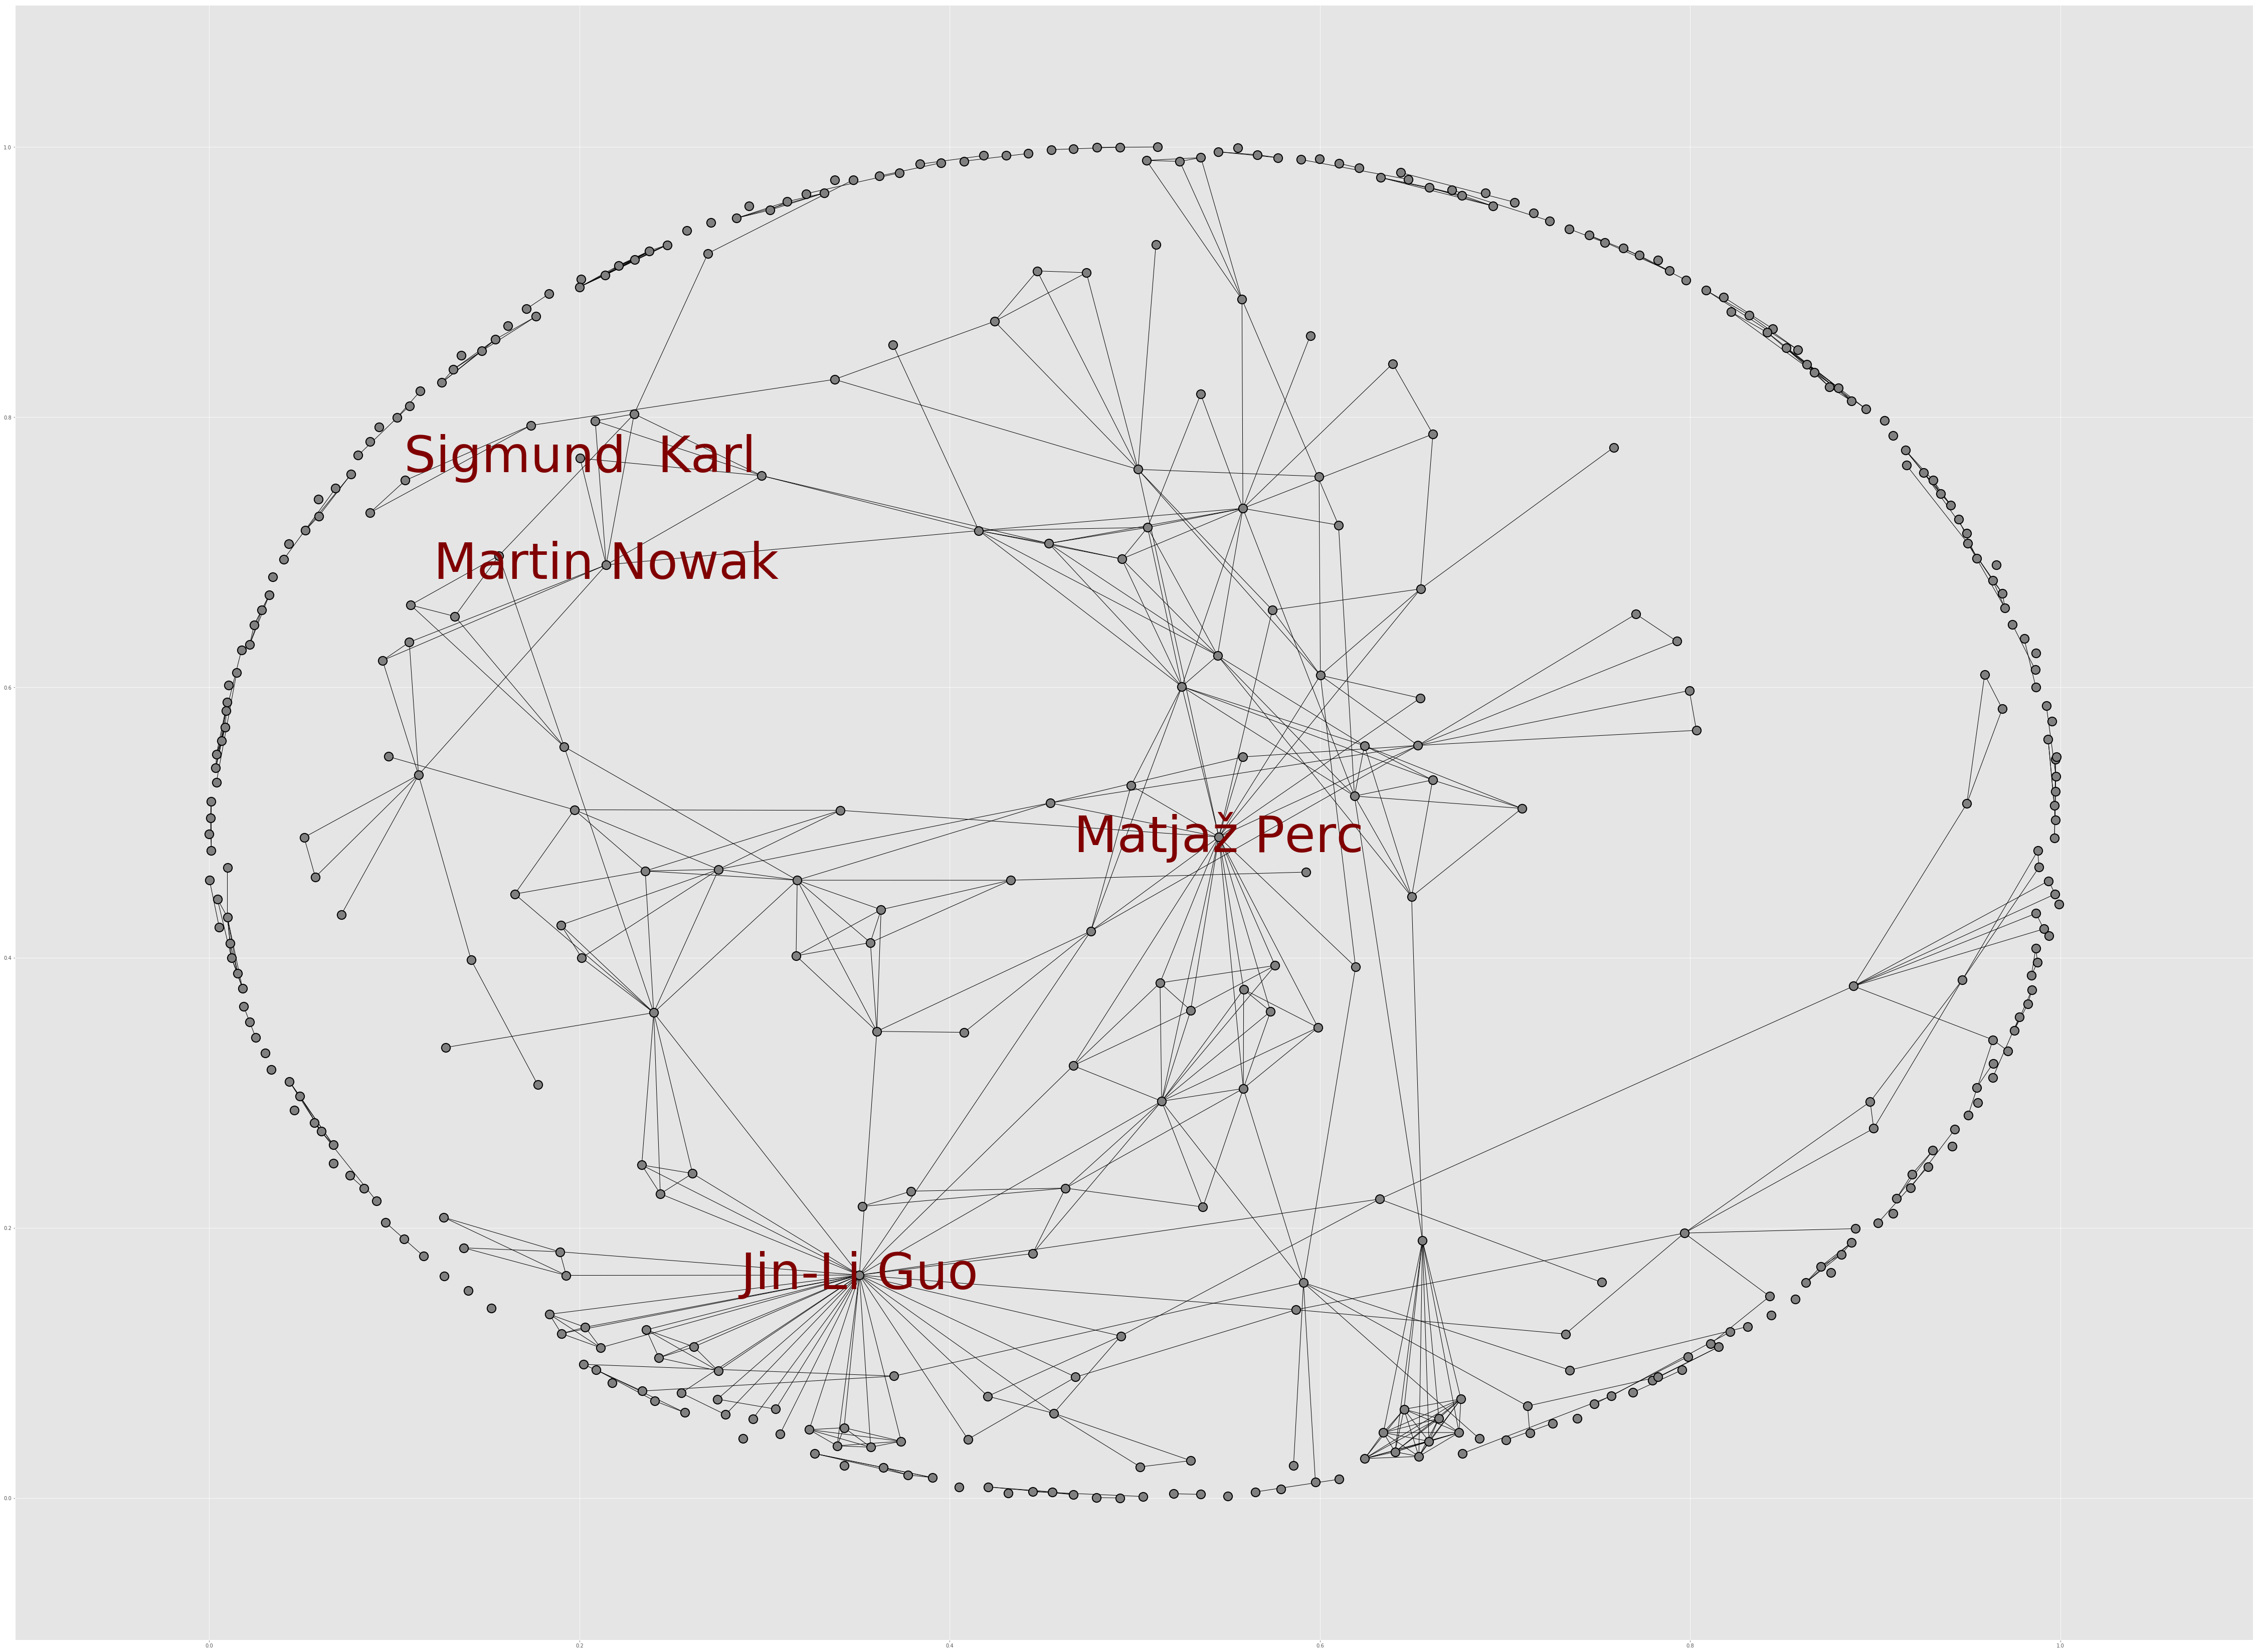

In [49]:
fig = figure(figsize=(80, 60))

#sm = plt.cm.ScalarMappable(cmap = matplotlib.cm.plasma_r)
#sm._A = []

#plt.title('Connection of Authors' , fontsize=40)
#nx.draw_spring(G)
#cbar = fig.colorbar(sm)
#cbar.set_ticks([0, 1])
#cbar.ax.set_yticklabels([minimum, maximum],fontsize=60)
#cbar.set_label("Number of Publications", fontsize=80)
#pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, linewidths=2, node_color='grey') #node_size=num_articles)
#nx.draw_networkx_labels(G, pos, labels=labels, font_size=80, font_color='maroon',)
nodes.set_edgecolor('black')

nx.draw_networkx_edges(G, pos)
#plt.savefig("/home/nightwing/src/Talks/network_two.pdf", format='pdf', bbox_inches='tight')